Обучение полносвязанной нейронной сети.

Статистика показывает, что каждый год средняя результативность команд НБА растет. В текущем сезоне команды набирают в среднем 110,6 очка, а в сезоне 2009-2010 команды набирают в среднем 100,4 очка. Задача нейронной сети определить по данным статистике к какому сезону относится данная игра.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

In [94]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline

In [95]:
path_train = "games.csv"
data_raw = pd.read_csv(path_train)
data_raw.shape

(25796, 21)

In [96]:
rows_to_drop = data_raw[
    (data_raw['PTS_home'] < data_raw['PTS_home'].quantile(0.005)) | (data_raw['PTS_home'] > data_raw['PTS_home'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(25579, 21)

In [97]:
data.isna().sum() 

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [98]:
data['PTS_home'].fillna(data['PTS_home'].mode().iloc[0], inplace=True)
data['FG_PCT_home'].fillna(data['FG_PCT_home'].mode().iloc[0], inplace=True)
data['FT_PCT_home'].fillna(data['FT_PCT_home'].mode().iloc[0], inplace=True)
data['FG3_PCT_home'    ].fillna(data['FG3_PCT_home'    ].mode().iloc[0], inplace=True)
data['AST_home'].fillna(data['AST_home'].mode().iloc[0], inplace=True)
data['REB_home'    ].fillna(data['REB_home'    ].mode().iloc[0], inplace=True)
data['PTS_away'].fillna(data['PTS_away'].mode().iloc[0], inplace=True)
data['FG_PCT_away'    ].fillna(data['FG_PCT_away'    ].mode().iloc[0], inplace=True)
data['FT_PCT_away'].fillna(data['FT_PCT_away'].mode().iloc[0], inplace=True)
data['FG3_PCT_away'    ].fillna(data['FG3_PCT_away'    ].mode().iloc[0], inplace=True)
data['AST_away'].fillna(data['AST_away'].mode().iloc[0], inplace=True)
data['REB_away'    ].fillna(data['REB_away'    ].mode().iloc[0], inplace=True)

In [99]:
data.isna().sum()  

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

In [100]:
data.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.557900e+04,2.557900e+04,2.557900e+04,25579.000000,2.557900e+04,25579.000000,25579.000000,25579.000000,25579.000000,25579.000000,25579.000000,2.557900e+04,25579.000000,25579.000000,25579.000000,25579.000000,25579.000000,25579.000000,25579.00000
mean,2.168650e+07,1.610613e+09,1.610613e+09,2011.796865,1.610613e+09,103.088823,0.460628,0.759696,0.355938,22.730873,43.336643,1.610613e+09,100.239415,0.449449,0.758028,0.349231,21.386137,42.068142,0.58853
std,5.479320e+06,8.635903e+00,8.652590e+00,5.389354,8.635903e+00,12.680743,0.055757,0.100391,0.111316,5.100941,6.601891,8.652590e+00,13.159421,0.055471,0.103264,0.109892,5.117072,6.498904,0.49211
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,71.000000,0.269000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,54.000000,0.244000,0.143000,0.000000,4.000000,20.000000,0.00000
25%,2.060110e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.00000
50%,2.120040e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.460000,0.765000,0.355000,23.000000,43.000000,1.610613e+09,100.000000,0.449000,0.762000,0.348000,21.000000,42.000000,1.00000
75%,2.170067e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,112.000000,0.500000,0.828000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.829000,0.419000,25.000000,46.000000,1.00000
max,5.200021e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,140.000000,0.684000,1.000000,1.000000,42.000000,72.000000,1.610613e+09,158.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.00000


In [101]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['GAME_DATE_EST', 'GAME_STATUS_TEXT']
['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']


In [102]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 0]
print(binary_columns, nonbinary_columns)

[] ['GAME_DATE_EST', 'GAME_STATUS_TEXT']


In [103]:
data['GAME_DATE_EST'].unique()

array(['2022-03-12', '2022-03-11', '2022-03-10', ..., '2014-10-06',
       '2014-10-05', '2014-10-04'], dtype=object)

In [104]:
data[nonbinary_columns]

,GAME_DATE_EST,GAME_STATUS_TEXT
0,2022-03-12,Final
1,2022-03-12,Final
2,2022-03-12,Final
3,2022-03-12,Final
4,2022-03-12,Final
...,...,...
25791,2014-10-06,Final
25792,2014-10-06,Final
25793,2014-10-06,Final
25794,2014-10-05,Final


In [105]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)
len(data_nonbinary.columns)

Index(['GAME_DATE_EST_2003-10-05', 'GAME_DATE_EST_2003-10-06',
       'GAME_DATE_EST_2003-10-07', 'GAME_DATE_EST_2003-10-08',
       'GAME_DATE_EST_2003-10-09', 'GAME_DATE_EST_2003-10-10',
       'GAME_DATE_EST_2003-10-11', 'GAME_DATE_EST_2003-10-12',
       'GAME_DATE_EST_2003-10-13', 'GAME_DATE_EST_2003-10-14',
       ...
       'GAME_DATE_EST_2022-03-04', 'GAME_DATE_EST_2022-03-05',
       'GAME_DATE_EST_2022-03-06', 'GAME_DATE_EST_2022-03-07',
       'GAME_DATE_EST_2022-03-08', 'GAME_DATE_EST_2022-03-09',
       'GAME_DATE_EST_2022-03-10', 'GAME_DATE_EST_2022-03-11',
       'GAME_DATE_EST_2022-03-12', 'GAME_STATUS_TEXT_Final'],
      dtype='object', length=4144)


4144

In [106]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.557900e+04,2.557900e+04,2.557900e+04,25579.000000,2.557900e+04,25579.000000,25579.000000,25579.000000,25579.000000,25579.000000,25579.000000,2.557900e+04,25579.000000,25579.000000,25579.000000,25579.000000,25579.000000,25579.000000,25579.00000
mean,2.168650e+07,1.610613e+09,1.610613e+09,2011.796865,1.610613e+09,103.088823,0.460628,0.759696,0.355938,22.730873,43.336643,1.610613e+09,100.239415,0.449449,0.758028,0.349231,21.386137,42.068142,0.58853
std,5.479320e+06,8.635903e+00,8.652590e+00,5.389354,8.635903e+00,12.680743,0.055757,0.100391,0.111316,5.100941,6.601891,8.652590e+00,13.159421,0.055471,0.103264,0.109892,5.117072,6.498904,0.49211
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,71.000000,0.269000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,54.000000,0.244000,0.143000,0.000000,4.000000,20.000000,0.00000
25%,2.060110e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.00000
50%,2.120040e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.460000,0.765000,0.355000,23.000000,43.000000,1.610613e+09,100.000000,0.449000,0.762000,0.348000,21.000000,42.000000,1.00000
75%,2.170067e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,112.000000,0.500000,0.828000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.829000,0.419000,25.000000,46.000000,1.00000
max,5.200021e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,140.000000,0.684000,1.000000,1.000000,42.000000,72.000000,1.610613e+09,158.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.00000


In [125]:
x = data.drop(['GAME_DATE_EST','GAME_STATUS_TEXT','GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON',
               'TEAM_ID_home', 'FT_PCT_home', 'FG3_PCT_home', 'TEAM_ID_away',
               'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS'], axis = 1)
y = data['SEASON']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(19184, 6395)

In [127]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [128]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: total: 1min 8s
Wall time: 11.4 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

In [131]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [132]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.9139908256880734 0.9150899139953088


In [133]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.0860091743119266 0.08491008600469116


In [134]:
print(1 - mlp_model.score(X_test, y_test))

0.9150899139953088


In [154]:
alpha_arr = np.logspace(1, 7, 23)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

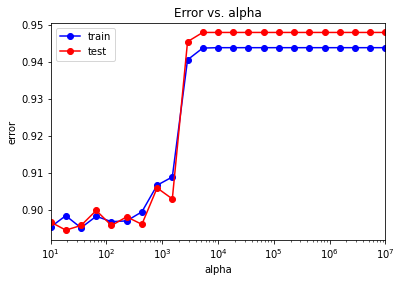

In [155]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

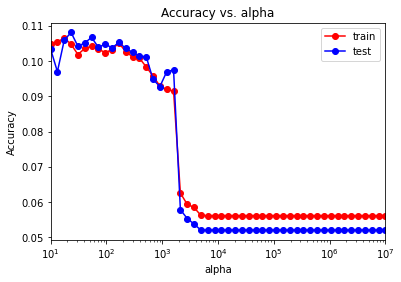

In [137]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [138]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.8935050041701418 0.8919468334636435


In [139]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[23.29951811]


In [140]:
alpha_opt = alpha_opt[0]

In [141]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.908256880733945
0.9105551211884284


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [142]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[148 109  98  89  97  82  81  92  98 107 100  96  77  66  66  58  30  30
   38]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 17  18  23  18   9  14  15  18  18   9  12   9  11   6   2   1   1   2
    2]
 [  9   3   8   8   3  13  14   7   2   5   9   6   6   2   2   2   0   0
    0]
 [  9   6   5  15  13  10  11  18   8  17  12   9  15  13   8  12   6   9
    5]
 [ 33  66  86  64  59  72  71  87  49  55  86  56  57  69  48  25  25  28
   14]
 [  1   0   0   0   0   1   4   2   2   0   6   4   4   4   7   4   2   4
    3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 44  34  48  41  46  39  37  43  29  58  48  46  28  23  16  11  16  13
   11]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  4   7  10  12  15   9  10  10  10  12  13  18  18  18  10   5   8   9
    6]
 [ 43  24  23  17  26  31  3

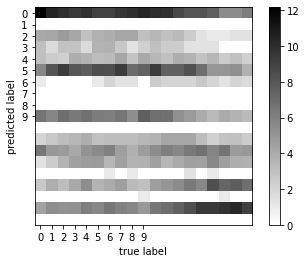

In [143]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Вывод: По данным статистики невозможно определить в каком сезоне была сыгран матч, при увеличение кол-ва характеристик ктороые у нас имеются процент ошибки только возрастает.